### Implement linear regression on the housing dataset (house price prediction with 2-dim features(square feet and number of bedrooms) )

#### 2D Housing Data 
- Features (x1 -> square feet, x2 -> number of bedrooms)
- Price (y -> Selling price)

In [73]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True
# load data using numpy
data = np.loadtxt('housing_prices.txt', delimiter=',')
X1 = data[:, 0]
X2 = data[:, 1]
Y  = data[:, 2]
tests_count = 10      # Test count
total_count = len(Y)
train_count = len(Y) - tests_count 

# Training Set
x1_train = X1[np.arange(0,train_count)]
x2_train = X2[np.arange(0,train_count)]
y_train  =  Y[np.arange(0,train_count)]

# Test Set
count_tsts = 10
x1_tests = X1[np.arange(train_count,total_count)]
x2_tests = X2[np.arange(train_count,total_count)]
y_tests  =  Y[np.arange(train_count,total_count)]

print('Total\t: ', total_count)
print('Test \t: ', len(y_tests))
print('Train\t: ', len(y_train))

Total	:  47
Test 	:  10
Train	:  37


### (a) Visualize Data

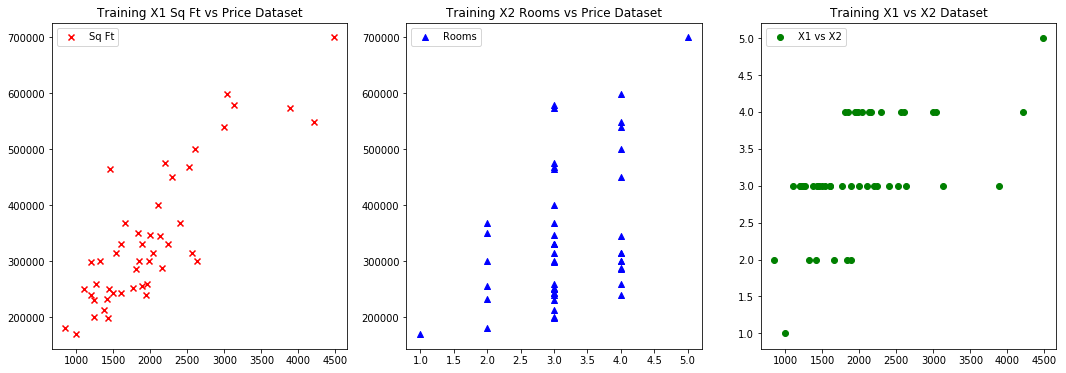

In [81]:
# Plot X1,X2 vs Y
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(18,6))
ax1.scatter(X1, Y, color = 'r',marker='x', label = 'Sq Ft')
ax1.set_title('Training X1 Sq Ft vs Price Dataset')
ax1.legend() 
ax2.scatter(X2, Y, color = 'b',marker='^', label = 'Rooms')
ax2.set_title('Training X2 Rooms vs Price Dataset')
ax2.legend() 
ax3.scatter(X1, X2, color = 'g',marker='o', label = 'X1 vs X2')
ax3.set_title('Training X1 vs X2 Dataset')
ax3.legend()    

In [85]:
import scipy
from sklearn import svm

def plotDecisionLine(X, Y):
    C = 1.0  # SVM regularization parameter
    clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
    clf.fit(X, Y)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    zz = lambda xx,yy: (-clf.intercept_[0]-clf.coef_[0][0]*xx-clf.coef_[0][1]) / clf.coef_[0][2]
    return xx, yy, zz, clf

xx,yy,zz,clf = plotDecisionLine(X1,X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='r', marker='o')
ax.plot_surface(xx, yy, zz(xx,yy))

ax.set_title(' Plot X1,X2,Y Dataset')
ax.set_xlabel('X1 Sq Ft')
ax.set_ylabel('X2 Rooms')
ax.set_zlabel('Y  Price')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[2104. 1600. 2400. 1416. 3000. 1985. 1534. 1427. 1380. 1494. 1940. 2000.
 1890. 4478. 1268. 2300. 1320. 1236. 2609. 3031. 1767. 1888. 1604. 1962.
 3890. 1100. 1458. 2526. 2200. 2637. 1839. 1000. 2040. 3137. 1811. 1437.
 1239. 2132. 4215. 2162. 1664. 2238. 2567. 1200.  852. 1852. 1203.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


### (b) Linear Loss Function with update rule 

In [84]:


# Initialize our perceptron
w = [0.,0.]
b = 0.
